In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filedirectory_path = os.path.expanduser('~') + '\\Midterm\\Data\\'
orig_file = filedirectory_path + 'OriginationCombined.csv'
perf_file = filedirectory_path + 'PerformanceCombined.csv'

In [3]:
orig_df = pd.read_csv(orig_file, low_memory=False)
orig_df.shape

(575000, 27)

In [4]:
perf_df = pd.read_csv(perf_file, low_memory=False)
perf_df.shape

(574957, 26)

In [5]:
combined_df = pd.merge(orig_df, perf_df, on='ln_sq_nbr', how='inner')
combined_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,574947,574948,574949,574950,574951,574952,574953,574954,574955,574956
cred_scr,722,759,591,792,725,788,691,687,784,703,...,808,705,789,761,779,793,709,730,746,804
fst_paymnt_dte,200504,200503,200504,200503,200503,200503,200503,200503,200503,200503,...,201701,201606,201701,201607,201606,201606,201606,201606,201701,201701
fst_hmebyr_flg,N,N,N,N,N,N,N,N,N,N,...,Unknown,Unknown,Unknown,Unknown,N,Unknown,Unknown,Unknown,Unknown,N
maturty_dte,203503,203502,203503,203502,203502,203502,203502,203502,203502,203502,...,203012,204605,203112,203106,204605,203105,204605,204605,204610,204612
metro_stat_area,0,0,39100,39100,48864,0,0,0,0,0,...,40580,38060,29460,12060,29820,45300,23844,26900,44300,22420
mort_insur_pctg,0,0,0,0,0,0,35,0,0,0,...,0,0,0,0,0,0,30,0,25,30
nbr_units,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
occu_status,O,O,O,O,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O
orig_cmbnd_ln_to_value,80,25,48,90,49,75,97,40,35,67,...,49,78,80,81,80,58,95,78,89,95
orig_dbt_to_incm,48,25,34,33,41,55,48,46,30,53,...,18,44,28,26,33,44,45,33,25,39


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

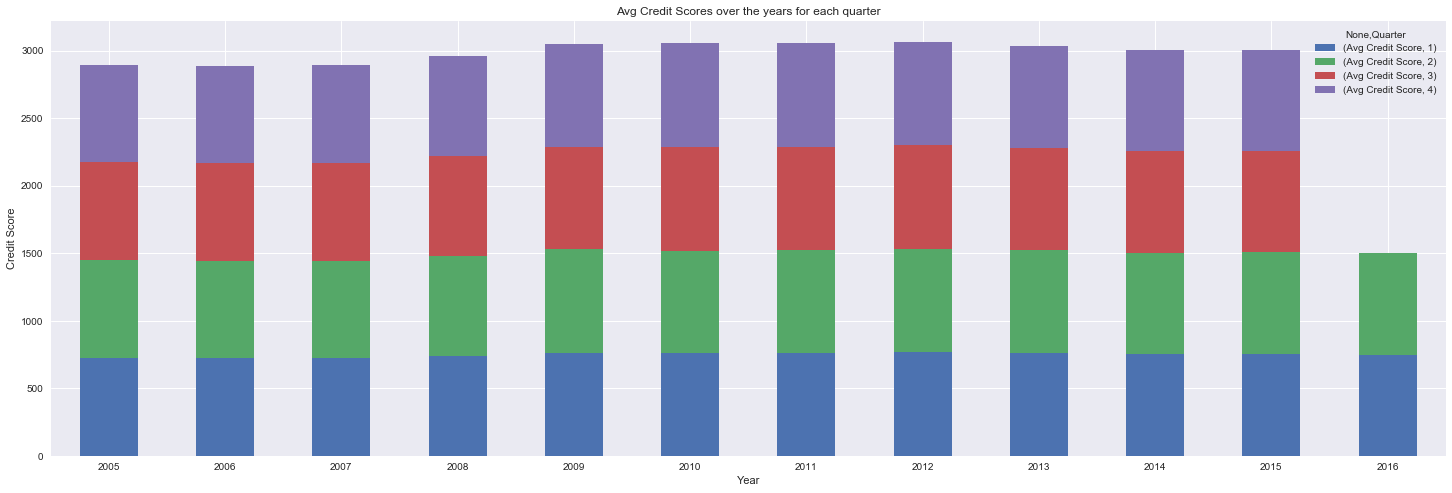

In [50]:
combined_df['Quarter'] = [x for x in combined_df['ln_sq_nbr'].apply(lambda x: x[5:6])]

cs_df = combined_df.groupby(['Year_Orig','Quarter'])['cred_scr'].mean().to_frame(name = 'Avg Credit Score')

cs_df.unstack().plot(title='Avg Credit Scores over the years for each quarter', kind='bar', stacked=True, figsize=(25,8))

plt.xlabel('Year')
plt.ylabel('Credit Score')
plt.xticks(rotation=0)

In [58]:
cs_df
#cs_df.groupby('Quarter').describe()

Avg Credit Score
Year_Orig Quarter                  
2005      1              721.962480
          2              724.591920
          3              726.686055
          4              721.442160
2006      1              721.148012
          2              722.688400
          3              722.936320
          4              721.863978
2007      1              722.922640
          2              721.270822
          3              722.951600
          4              723.503401
2008      1              736.084727
          2              739.762442
          3              740.353708
          4              746.070491
2009      1              762.793936
          2              765.650160
          3              760.025602
          4              760.073286
2010      1              758.764800
          2              760.081447
          3              766.602480
          4              766.888711
2011      1              761.332240
          2              759.831600
          3              765.040006
          4              768.992479
2012      1              767.869419
          2              765.862229
          3              766.743840
          4              765.677280
2013      1              763.808400
          2              761.264800
          3              754.925920
          4              751.744560
2014      1              750.978880
          2              751.473920
          3              751.454880
          4              751.404080
2015      1              754.822240
          2              752.963840
          3              750.873520
          4              748.271142
2016      1              748.454873
          2              750.601458

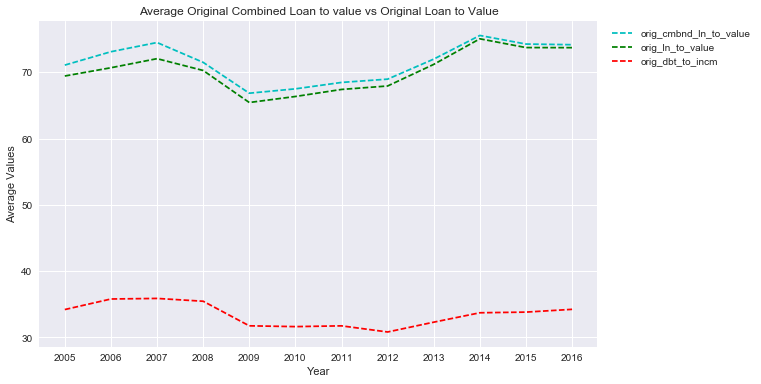

,orig_cmbnd_ln_to_value,orig_ln_to_value,orig_dbt_to_incm
Year_Orig,,,
2005,71.094362,69.446849,34.214324
2006,73.111027,70.693802,35.806508
2007,74.498120,72.063345,35.891651
2008,71.505381,70.282774,35.467916
2009,66.852957,65.449509,31.758815
2010,67.510360,66.357314,31.639166
2011,68.477509,67.420025,31.754085
2012,68.973318,67.940856,30.830670
2013,71.996780,71.201500,32.309660


In [7]:
ltv_df = combined_df.groupby('Year_Orig')['orig_cmbnd_ln_to_value', 'orig_ln_to_value', \
                                          'orig_dbt_to_incm'].mean()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

ax1.plot(ltv_df.index, ltv_df.orig_cmbnd_ln_to_value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1.plot(ltv_df.index, ltv_df.orig_ln_to_value, label='orig_ln_to_value', color='g', linestyle='--')
ax1.plot(ltv_df.index, ltv_df.orig_dbt_to_incm, label='orig_dbt_to_incm', color='r', linestyle='--')

ax1.set_title('Average Original Combined Loan to value vs Original Loan to Value')
plt.xticks(ltv_df.index)
plt.xlabel('Year')
plt.ylabel('Average Values')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')
plt.show()

ltv_df

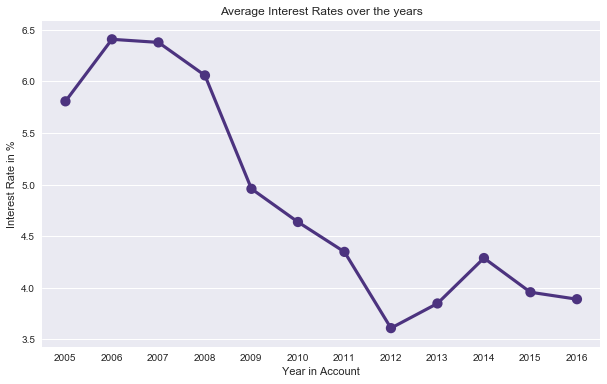

In [8]:
loss_calc_df = pd.DataFrame(combined_df.groupby('Year_Orig')['orig_intrst_rate'].mean())
# Creating subplots
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1, 1, 1)

# Creating plot for average interest rates
ax1 = sns.pointplot(x=loss_calc_df.index, y=loss_calc_df.orig_intrst_rate, data=loss_calc_df, ax=ax1, color="#4c337f") 
ax1.set_title('Average Interest Rates over the years')
ax1.set_xlabel("Year in Account")
ax1.set_ylabel("Interest Rate in %")

# Rotating the x axis values by 90 degrees to avoid overlapping
#for ax in fig.axes:
#    plt.sca(ax)
#    plt.xticks(rotation=90)

# Displaying the value on top of each bar
#for ax in fig.axes:
#    for p in ax.patches:
#        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', va='bottom')

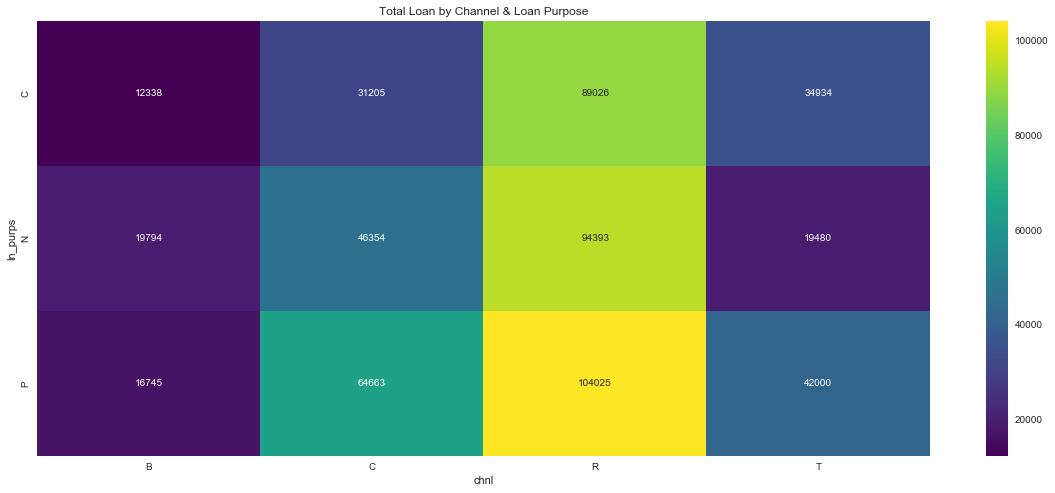

chnl,B,C,R,T
ln_purps,,,,
C,12338,31205,89026,34934
N,19794,46354,94393,19480
P,16745,64663,104025,42000


In [9]:
loan_pur_df = combined_df.groupby(['ln_purps', 'chnl']).size().unstack()
#loan_pur_df.plot(title='Loan Purpose vs Loan Channel', kind='bar', stacked=False, figsize=(12,6))
plt.figure(figsize=(20, 8))
plt.title('Total Loan by Channel & Loan Purpose')
sns.heatmap(loan_pur_df, annot=True, fmt="g", cmap='viridis')
plt.show()

loan_pur_df

In [18]:
# Preparing DataFrames for Property Type based on Original UPB

prop_df = pd.DataFrame(combined_df.groupby(['Year_Orig'])['orig_upb'].sum())

condo_df = pd.DataFrame(combined_df[combined_df['proptype'] == 'CO'].groupby(['Year_Orig', 'proptype'])['orig_upb'].count())

leasehold_df = pd.DataFrame(combined_df[combined_df['proptype'] == 'LH'].groupby(['Year_Orig', 'proptype'])['orig_upb'].count())

PUD_df = pd.DataFrame(combined_df[combined_df['proptype'] == 'PU'].groupby(['Year_Orig', 'proptype'])['orig_upb'].count())

ManufHousing_df = pd.DataFrame(combined_df[combined_df['proptype'] == 'MH'].groupby(['Year_Orig', 'proptype'])['orig_upb'].count())

Single_Family_df = pd.DataFrame(combined_df[combined_df['proptype'] == 'SF'].groupby(['Year_Orig', 'proptype'])['orig_upb'].count())

COOP_df = pd.DataFrame(combined_df[combined_df['proptype'] == 'CP'].groupby(['Year_Orig', 'proptype'])['orig_upb'].count())

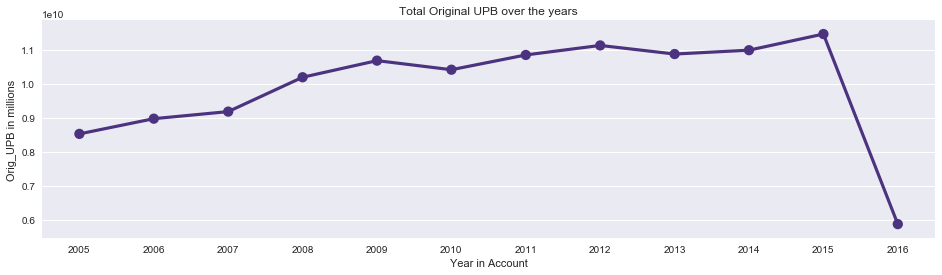

In [43]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 1, 1)

# Creating plot for average interest rates
ax1 = sns.pointplot(x=prop_df.index, y=prop_df.orig_upb, data=prop_df, ax=ax1, color="#4c337f") 
ax1.set_title('Total Original UPB over the years')
ax1.set_xlabel("Year in Account")
ax1.set_ylabel("Orig_UPB in millions")

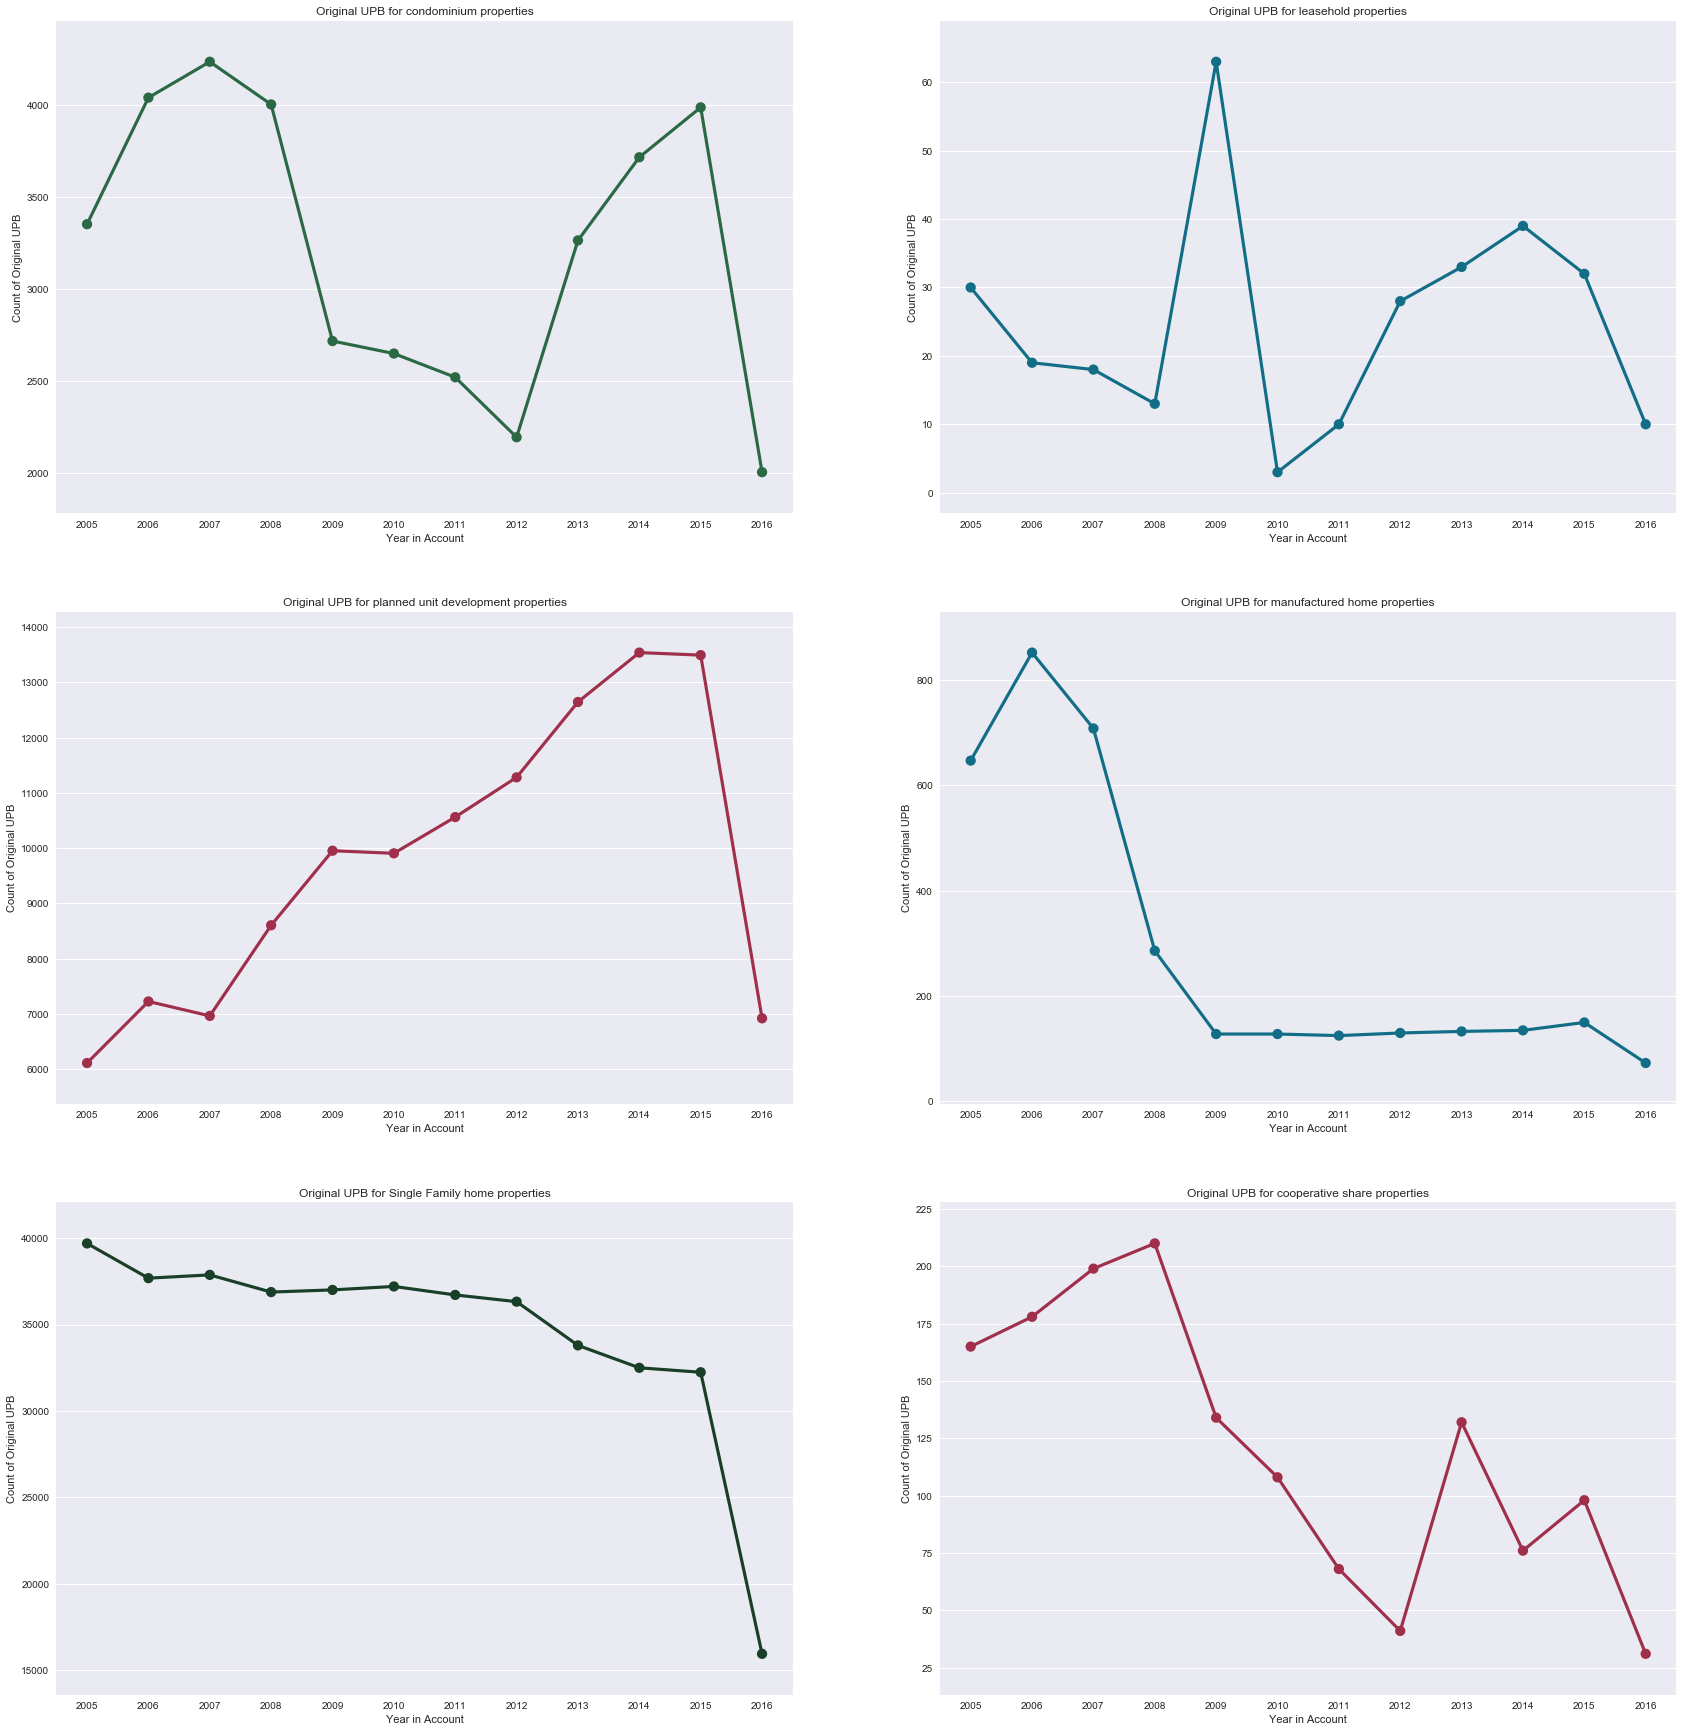

In [44]:
# Creating four subplots
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

# Creating plot for condominium properties
ax1 = sns.pointplot(x=[x[0] for x in condo_df.index.values], y=condo_df.orig_upb, data=condo_df, ax=ax1, color="#2b6944") 
ax1.set_title('Original UPB for condominium properties')
ax1.set_xlabel("Year in Account")
ax1.set_ylabel("Count of Original UPB")

# Creating plot for leasehold properties
ax2 = sns.pointplot(x=[x[0] for x in leasehold_df.index.values], y=leasehold_df.orig_upb, data=leasehold_df, ax=ax2, color="#126e87") 
ax2.set_title('Original UPB for leasehold properties')
ax2.set_xlabel("Year in Account")
ax2.set_ylabel("Count of Original UPB")

# Creating plot for planned unit development properties
ax3 = sns.pointplot(x=[x[0] for x in PUD_df.index.values], y=PUD_df.orig_upb, data=PUD_df, ax=ax3, color="#a02f4c") 
ax3.set_title('Original UPB for planned unit development properties')
ax3.set_xlabel("Year in Account")
ax3.set_ylabel("Count of Original UPB")

# Creating plot for manufactured home properties
ax4 = sns.pointplot(x=[x[0] for x in ManufHousing_df.index.values], y=ManufHousing_df.orig_upb, data=ManufHousing_df, ax=ax4, color="#126e87") 
ax4.set_title('Original UPB for manufactured home properties')
ax4.set_xlabel("Year in Account")
ax4.set_ylabel("Count of Original UPB")

# Creating plot for Single Family home properties
ax5 = sns.pointplot(x=[x[0] for x in Single_Family_df.index.values], y=Single_Family_df.orig_upb, data=Single_Family_df, ax=ax5, color="#193f28") 
ax5.set_title('Original UPB for Single Family home properties')
ax5.set_xlabel("Year in Account")
ax5.set_ylabel("Count of Original UPB")

# Creating plot for cooperative share properties
ax6 = sns.pointplot(x=[x[0] for x in COOP_df.index.values], y=COOP_df.orig_upb, data=COOP_df, ax=ax6, color="#a02f4c") 
ax6.set_title('Original UPB for cooperative share properties')
ax6.set_xlabel("Year in Account")
ax6.set_ylabel("Count of Original UPB")

# Adjusting the positions of the graph
plt.subplots_adjust(right=2, top=4)

In [118]:
delinq_df = pd.DataFrame()

temp = combined_df['max_curr_ln_delin_status'].groupby(combined_df['Year_Orig']).value_counts()
#temp

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

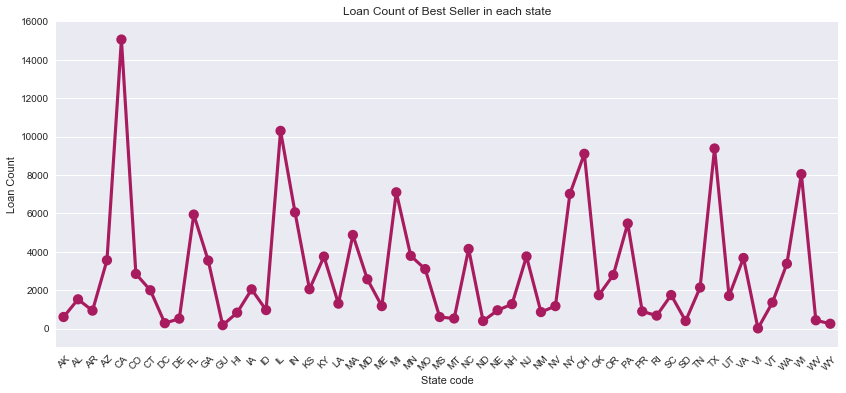

In [59]:
top_seller = combined_df.groupby(['propstate', 'slr_name'])['ln_sq_nbr'].count().reset_index()

top_seller_state = top_seller.groupby('propstate')['ln_sq_nbr'].max().reset_index()

final_df = pd.merge(top_seller, top_seller_state, on=['propstate', 'ln_sq_nbr'], how='inner')

final_df = final_df.rename(columns = {'ln_sq_nbr': 'Loan_Count'})

fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1, 1, 1)

# Creating plot for best seller
ax1 = sns.pointplot(x= final_df.propstate, y= final_df.Loan_Count, data=final_df, ax=ax1, color="#a81c5f") 
ax1.set_title('Loan Count of Best Seller in each state')
ax1.set_xlabel("State code")
ax1.set_ylabel("Loan Count")
plt.xticks(rotation=45)

In [60]:
final_df

,propstate,slr_name,Loan_Count
0,AK,"WELLSFARGOBANK,NA",602
1,AL,Other sellers,1523
2,AR,"WELLSFARGOBANK,NA",933
3,AZ,"WELLSFARGOBANK,NA",3556
4,CA,"WELLSFARGOBANK,NA",15050
5,CO,"WELLSFARGOBANK,NA",2845
6,CT,Other sellers,1994
7,DC,"WELLSFARGOBANK,NA",280
8,DE,"WELLSFARGOBANK,NA",515
9,FL,"WELLSFARGOBANK,NA",5935


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

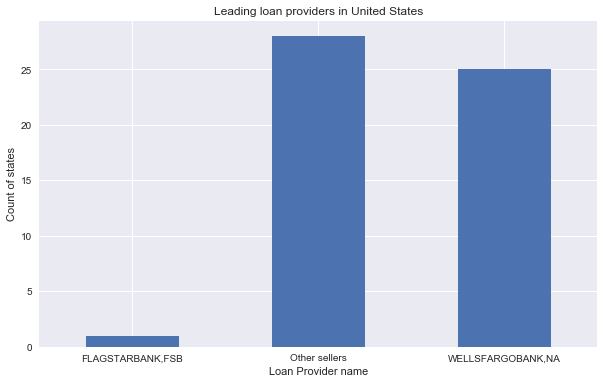

In [61]:
final_df.groupby('slr_name')['propstate'].count().plot(title='Leading loan providers in United States', \
                                                       kind='bar', figsize=(10,6))

plt.xlabel('Loan Provider name')
plt.ylabel('Count of states')
plt.xticks(rotation=0)